# Load the CSV data 

In [4]:
import pandas as pd 

dataset_path="/home/yassine/football_predict/R_csv/premier_league_matches.csv"

d_fixtures = pd.read_csv(dataset_path)

d_fixtures.head()

,Competition_Name,Gender,Country,Season_End_Year,Round,Wk,Day,Date,Time,Home,HomeGoals,Home_xG,Away,AwayGoals,Away_xG,Attendance,Venue,Referee,Notes,MatchURL
0,Premier League,M,ENG,2018,NaN,1,Fri,2017-08-11,19:45,Arsenal,4,2.5,Leicester City,3,1.5,59387.0,Emirates Stadium,Mike Dean,NaN,https://fbref.com/en/matches/e3c3ddf0/Arsenal-...
1,Premier League,M,ENG,2018,NaN,1,Sat,2017-08-12,12:30,Watford,3,2.1,Liverpool,3,2.6,20407.0,Vicarage Road Stadium,Anthony Taylor,NaN,https://fbref.com/en/matches/60f6cc1d/Watford-...
2,Premier League,M,ENG,2018,NaN,1,Sat,2017-08-12,15:00,Crystal Palace,0,1.1,Huddersfield,3,1.5,25448.0,Selhurst Park,Jonathan Moss,NaN,https://fbref.com/en/matches/2d369d17/Crystal-...
3,Premier League,M,ENG,2018,NaN,1,Sat,2017-08-12,15:00,West Brom,1,1.3,Bournemouth,0,0.5,25011.0,The Hawthorns,Robert Madley,NaN,https://fbref.com/en/matches/684f704a/West-Bro...
4,Premier League,M,ENG,2018,NaN,1,Sat,2017-08-12,15:00,Chelsea,2,1.5,Burnley,3,0.6,41616.0,Stamford Bridge,Craig Pawson,NaN,https://fbref.com/en/matches/71b00bca/Chelsea-...


In [5]:
print(d_fixtures.columns)

Index(['Competition_Name', 'Gender', 'Country', 'Season_End_Year', 'Round',
       'Wk', 'Day', 'Date', 'Time', 'Home', 'HomeGoals', 'Home_xG', 'Away',
       'AwayGoals', 'Away_xG', 'Attendance', 'Venue', 'Referee', 'Notes',
       'MatchURL'],
      dtype='object')


In [6]:
datasetStats_path = "/home/yassine/football_predict/R_csv/team_stats.csv"
d_stats = pd.read_csv(datasetStats_path)

d_stats.head()

,Competition_Name,Gender,Country,Season_End_Year,Squad,Team_or_Opponent,Num_Players,Mins_Per_90,Gls_Standard,Sh_Standard,...,G_per_SoT_Standard,Dist_Standard,FK_Standard,PK_Standard,PKatt_Standard,xG_Expected,npxG_Expected,npxG_per_Sh_Expected,G_minus_xG_Expected,np:G_minus_xG_Expected
0,Premier League,M,ENG,2018,Arsenal,team,30,38,73,589,...,0.31,17.9,30,4,5,68.3,64.3,0.11,4.7,4.7
1,Premier League,M,ENG,2018,Bournemouth,team,22,38,45,462,...,0.27,18.3,15,3,3,38.8,36.4,0.08,6.2,5.6
2,Premier League,M,ENG,2018,Brighton,team,24,38,33,377,...,0.25,18.3,4,5,7,37.0,31.8,0.09,-4.0,-3.8
3,Premier League,M,ENG,2018,Burnley,team,24,38,35,378,...,0.28,17.0,16,0,0,32.3,32.3,0.09,2.7,2.7
4,Premier League,M,ENG,2018,Chelsea,team,26,38,60,603,...,0.27,17.9,20,3,3,54.4,52.0,0.09,5.6,5.0


In [8]:
print(d_stats.columns)

Index(['Competition_Name', 'Gender', 'Country', 'Season_End_Year', 'Squad',
       'Team_or_Opponent', 'Num_Players', 'Mins_Per_90', 'Gls_Standard',
       'Sh_Standard', 'SoT_Standard', 'SoT_percent_Standard',
       'Sh_per_90_Standard', 'SoT_per_90_Standard', 'G_per_Sh_Standard',
       'G_per_SoT_Standard', 'Dist_Standard', 'FK_Standard', 'PK_Standard',
       'PKatt_Standard', 'xG_Expected', 'npxG_Expected',
       'npxG_per_Sh_Expected', 'G_minus_xG_Expected',
       'np:G_minus_xG_Expected'],
      dtype='object')


In [14]:
import pandas as pd

# Load the data
matches = pd.read_csv("/home/yassine/football_predict/R_csv/premier_league_matches.csv")
team_stats = pd.read_csv("/home/yassine/football_predict/R_csv/team_stats.csv")

# 1. Extract Season from Matches Data:
# Create a 'Season' column in the matches data.
matches['Season'] = pd.to_numeric(matches['Season_End_Year']) #Convert the column to numeric

# 2. Standardize Team Names (Crucial):
team_name_mapping = {
    "Manchester United": "Manchester Utd",
    "Tottenham Hotspur": "Tottenham",
    # Add other team name mappings as needed
}

matches['Home'] = matches['Home'].map(team_name_mapping).fillna(matches['Home'])
matches['Away'] = matches['Away'].map(team_name_mapping).fillna(matches['Away'])
team_stats['Squad'] = team_stats['Squad'].map(team_name_mapping).fillna(team_stats['Squad'])

# 3. Merge the Data:
# Merge for Home Teams
merged_data = matches.merge(team_stats, left_on=['Season', 'Home'], right_on=['Season_End_Year', 'Squad'], how='left', suffixes=('', '_Home'))

# Merge for Away Teams
merged_data = merged_data.merge(team_stats, left_on=['Season', 'Away'], right_on=['Season_End_Year', 'Squad'], how='left', suffixes=('', '_Away'))

#Remove the duplicate columns
# 4. Remove the duplicate columns (check if they exist first)
columns_to_drop = ['Season_End_Year_Home', 'Squad_Home', 'Season_End_Year_Away', 'Squad_Away']
columns_to_drop = [col for col in columns_to_drop if col in merged_data.columns] # Check if the columns exist before dropping them
merged_data = merged_data.drop(columns=columns_to_drop)
# 4. Save the Combined Data:
merged_data.to_csv("/home/yassine/football_predict/R_csv/combined_data.csv", index=False)
print("Combined data saved to combined_data.csv")

Combined data saved to combined_data.csv


In [15]:
merged_data.head()

,Competition_Name,Gender,Country,Season_End_Year,Round,Wk,Day,Date,Time,Home,...,G_per_SoT_Standard_Away,Dist_Standard_Away,FK_Standard_Away,PK_Standard_Away,PKatt_Standard_Away,xG_Expected_Away,npxG_Expected_Away,npxG_per_Sh_Expected_Away,G_minus_xG_Expected_Away,np:G_minus_xG_Expected_Away
0,Premier League,M,ENG,2018,NaN,1,Fri,2017-08-11,19:45,Arsenal,...,0.35,17.6,11,5,6,50.0,45.3,0.11,3.0,2.7
1,Premier League,M,ENG,2018,NaN,1,Sat,2017-08-12,12:30,Watford,...,0.35,17.7,22,2,3,72.9,70.6,0.11,9.1,9.4
2,Premier League,M,ENG,2018,NaN,1,Sat,2017-08-12,15:00,Crystal Palace,...,0.22,18.8,14,2,2,31.3,29.8,0.08,-6.3,-6.8
3,Premier League,M,ENG,2018,NaN,1,Sat,2017-08-12,15:00,West Brom,...,0.27,18.3,15,3,3,38.8,36.4,0.08,6.2,5.6
4,Premier League,M,ENG,2018,NaN,1,Sat,2017-08-12,15:00,Chelsea,...,0.28,17.0,16,0,0,32.3,32.3,0.09,2.7,2.7


In [17]:
print(merged_data.columns)

Index(['Competition_Name', 'Gender', 'Country', 'Season_End_Year', 'Round',
       'Wk', 'Day', 'Date', 'Time', 'Home', 'HomeGoals', 'Home_xG', 'Away',
       'AwayGoals', 'Away_xG', 'Attendance', 'Venue', 'Referee', 'Notes',
       'MatchURL', 'Season', 'Competition_Name_Home', 'Gender_Home',
       'Country_Home', 'Squad', 'Team_or_Opponent', 'Num_Players',
       'Mins_Per_90', 'Gls_Standard', 'Sh_Standard', 'SoT_Standard',
       'SoT_percent_Standard', 'Sh_per_90_Standard', 'SoT_per_90_Standard',
       'G_per_Sh_Standard', 'G_per_SoT_Standard', 'Dist_Standard',
       'FK_Standard', 'PK_Standard', 'PKatt_Standard', 'xG_Expected',
       'npxG_Expected', 'npxG_per_Sh_Expected', 'G_minus_xG_Expected',
       'np:G_minus_xG_Expected', 'Competition_Name_Away', 'Gender_Away',
       'Country_Away', 'Team_or_Opponent_Away', 'Num_Players_Away',
       'Mins_Per_90_Away', 'Gls_Standard_Away', 'Sh_Standard_Away',
       'SoT_Standard_Away', 'SoT_percent_Standard_Away',
       'Sh_per_90_S

# Feature engineering

In the next cell im creating a new feature wich i found important wich is the ranking of each of the two teams before there game 


In [44]:
import pandas as pd

path = "/home/yassine/football_predict/R_csv/combined_data.csv"

matches = pd.read_csv(path)

matches['Date'] = pd.to_datetime(matches['Date'])
matches['Season'] = pd.to_numeric(matches['Season_End_Year'])

# 2. Sort matches:
matches = matches.sort_values(by=['Season', 'Date']).reset_index(drop=True)

# 3. Calculate cumulative points and other stats:
def calculate_cumulative_stats_and_rankings(df):
    df['HomePoints'] = 0
    df['AwayPoints'] = 0
    df['HomeGF_cum'] = 0
    df['HomeGA_cum'] = 0
    df['AwayGF_cum'] = 0
    df['AwayGA_cum'] = 0
    df['HomeRank'] = 0
    df['AwayRank'] = 0
    cumulative_stats = {}  # Dictionary to store cumulative stats for each team

    for i in range(len(df)):
        home_team = df.loc[i, 'Home']
        away_team = df.loc[i, 'Away']
        home_goals = df.loc[i, 'HomeGoals']
        away_goals = df.loc[i, 'AwayGoals']

        # Update cumulative stats
        if home_team not in cumulative_stats:
            cumulative_stats[home_team] = {'Points': 0, 'GF': 0, 'GA': 0}
        if away_team not in cumulative_stats:
            cumulative_stats[away_team] = {'Points': 0, 'GF': 0, 'GA': 0}

        if home_goals > away_goals:
            cumulative_stats[home_team]['Points'] += 3
        elif home_goals < away_goals:
            cumulative_stats[away_team]['Points'] += 3
        else:
            cumulative_stats[home_team]['Points'] += 1
            cumulative_stats[away_team]['Points'] += 1

        cumulative_stats[home_team]['GF'] += home_goals
        cumulative_stats[home_team]['GA'] += away_goals
        cumulative_stats[away_team]['GF'] += away_goals
        cumulative_stats[away_team]['GA'] += home_goals

        # Calculate rankings
        ranked_teams = sorted(cumulative_stats.items(), key=lambda item: (item[1]['Points'], (item[1]['GF'] - item[1]['GA']), item[1]['GF']), reverse=True)
        home_rank = [i + 1 for i, team in enumerate(ranked_teams) if team[0] == home_team][0]
        away_rank = [i + 1 for i, team in enumerate(ranked_teams) if team[0] == away_team][0]

        df.loc[i, 'HomeRank'] = home_rank
        df.loc[i, 'AwayRank'] = away_rank
        df.loc[i, 'HomePoints'] = cumulative_stats[home_team]['Points']
        df.loc[i, 'AwayPoints'] = cumulative_stats[away_team]['Points']
        df.loc[i, 'HomeGF_cum'] = cumulative_stats[home_team]['GF']
        df.loc[i, 'HomeGA_cum'] = cumulative_stats[home_team]['GA']
        df.loc[i, 'AwayGF_cum'] = cumulative_stats[away_team]['GF']
        df.loc[i, 'AwayGA_cum'] = cumulative_stats[away_team]['GA']

    return df



In [45]:
merged_data = calculate_cumulative_stats_and_rankings(matches)

In [46]:
merged_data.head()

,Competition_Name,Gender,Country,Season_End_Year,Round,Wk,Day,Date,Time,Home,...,G_minus_xG_Expected_Away,np:G_minus_xG_Expected_Away,HomePoints,AwayPoints,HomeGF_cum,HomeGA_cum,AwayGF_cum,AwayGA_cum,HomeRank,AwayRank
0,Premier League,M,ENG,2018,NaN,1,Fri,2017-08-11,19:45,Arsenal,...,3.0,2.7,3,0,4,3,3,4,1,2
1,Premier League,M,ENG,2018,NaN,1,Sat,2017-08-12,12:30,Watford,...,9.1,9.4,1,1,3,3,3,3,2,3
2,Premier League,M,ENG,2018,NaN,1,Sat,2017-08-12,15:00,Crystal Palace,...,-6.3,-6.8,0,3,0,3,3,0,6,1
3,Premier League,M,ENG,2018,NaN,1,Sat,2017-08-12,15:00,West Brom,...,6.2,5.6,3,0,1,0,0,1,3,7
4,Premier League,M,ENG,2018,NaN,1,Sat,2017-08-12,15:00,Chelsea,...,2.7,2.7,0,3,2,3,3,2,8,3


In [47]:
print(merged_data.columns)

Index(['Competition_Name', 'Gender', 'Country', 'Season_End_Year', 'Round',
       'Wk', 'Day', 'Date', 'Time', 'Home', 'HomeGoals', 'Home_xG', 'Away',
       'AwayGoals', 'Away_xG', 'Attendance', 'Venue', 'Referee', 'Notes',
       'MatchURL', 'Season', 'Competition_Name_Home', 'Gender_Home',
       'Country_Home', 'Squad', 'Team_or_Opponent', 'Num_Players',
       'Mins_Per_90', 'Gls_Standard', 'Sh_Standard', 'SoT_Standard',
       'SoT_percent_Standard', 'Sh_per_90_Standard', 'SoT_per_90_Standard',
       'G_per_Sh_Standard', 'G_per_SoT_Standard', 'Dist_Standard',
       'FK_Standard', 'PK_Standard', 'PKatt_Standard', 'xG_Expected',
       'npxG_Expected', 'npxG_per_Sh_Expected', 'G_minus_xG_Expected',
       'np:G_minus_xG_Expected', 'Competition_Name_Away', 'Gender_Away',
       'Country_Away', 'Team_or_Opponent_Away', 'Num_Players_Away',
       'Mins_Per_90_Away', 'Gls_Standard_Away', 'Sh_Standard_Away',
       'SoT_Standard_Away', 'SoT_percent_Standard_Away',
       'Sh_per_90_S

In [49]:
merged_data['GoalDifference'] = merged_data['HomeGoals'] - merged_data['AwayGoals']

merged_data['xG_Difference'] = merged_data['Home_xG'] - merged_data['Away_xG']

# 3. Select the Columns to Keep (adjust as needed)
columns_to_keep = ['Date', 'Home', 'Away', 'GoalDifference', 'xG_Difference', 'Season',
    'Sh_per_90_Standard', 'SoT_percent_Standard',
    'Sh_per_90_Standard_Away', 'SoT_percent_Standard_Away','HomeRank','AwayRank']
merged_data = merged_data[columns_to_keep]

In [50]:
# 3. Save the Cleaned Data
merged_data.to_csv("/home/yassine/football_predict/R_csv/cleaned_combined_data.csv", index=False)
print("Cleaned combined data (8 features) saved to cleaned_combined_data_8features.csv")

Cleaned combined data (8 features) saved to cleaned_combined_data_8features.csv


In [51]:
merged_data.head()

,Date,Home,Away,GoalDifference,xG_Difference,Season,Sh_per_90_Standard,SoT_percent_Standard,Sh_per_90_Standard_Away,SoT_percent_Standard_Away,HomeRank,AwayRank
0,2017-08-11,Arsenal,Leicester City,1,1.0,2018,15.50,37.9,10.97,32.9,1,2
1,2017-08-12,Watford,Liverpool,0,-0.5,2018,11.42,29.0,16.71,35.6,2,3
2,2017-08-12,Crystal Palace,Huddersfield,-3,-0.4,2018,12.26,28.8,9.47,29.4,6,1
3,2017-08-12,West Brom,Bournemouth,1,0.8,2018,9.92,29.4,12.16,33.1,3,7
4,2017-08-12,Chelsea,Burnley,-1,0.9,2018,15.87,34.8,9.95,33.3,8,3


# Check for missing values 

In [1]:
import pandas as pd 

path = "/home/yassine/football_predict/R_csv/cleaned_combined_data.csv"

data  = pd.read_csv(path)

print(data .columns)
print(f"number of rows: ",data.shape[0])

Index(['Date', 'Home', 'Away', 'GoalDifference', 'xG_Difference', 'Season',
       'Sh_per_90_Standard', 'SoT_percent_Standard', 'Sh_per_90_Standard_Away',
       'SoT_percent_Standard_Away', 'HomeRank', 'AwayRank'],
      dtype='object')
number of rows:  2660


In [2]:
print(data.isnull().sum())

Date                         0
Home                         0
Away                         0
GoalDifference               0
xG_Difference                0
Season                       0
Sh_per_90_Standard           0
SoT_percent_Standard         0
Sh_per_90_Standard_Away      0
SoT_percent_Standard_Away    0
HomeRank                     0
AwayRank                     0
dtype: int64


it seems to be no missing values in our dataset 

# Convert Datatype 
 converting to datetime ensures correct sorting and enables date-based operations

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0      2017-08-11
1      2017-08-12
2      2017-08-12
3      2017-08-12
4      2017-08-12
          ...    
2655   2024-05-19
2656   2024-05-19
2657   2024-05-19
2658   2024-05-19
2659   2024-05-19
Name: Date, Length: 2660, dtype: datetime64[ns]

In [4]:
data['Season'] = data['Season'].astype('category')
data['Season']

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
2655    2024
2656    2024
2657    2024
2658    2024
2659    2024
Name: Season, Length: 2660, dtype: category
Categories (7, int64): [2018, 2019, 2020, 2021, 2022, 2023, 2024]

## One Hot encoding 

In [5]:
from sklearn.preprocessing import StandardScaler

matches = pd.get_dummies(data, columns=['Home', 'Away'], prefix=['Home', 'Away'])

In [6]:
matches.head()


,Date,GoalDifference,xG_Difference,Season,Sh_per_90_Standard,SoT_percent_Standard,Sh_per_90_Standard_Away,SoT_percent_Standard_Away,HomeRank,AwayRank,...,Away_Nott'ham Forest,Away_Sheffield Utd,Away_Southampton,Away_Stoke City,Away_Swansea City,Away_Tottenham,Away_Watford,Away_West Brom,Away_West Ham,Away_Wolves
0,2017-08-11,1,1.0,2018,15.50,37.9,10.97,32.9,1,2,...,False,False,False,False,False,False,False,False,False,False
1,2017-08-12,0,-0.5,2018,11.42,29.0,16.71,35.6,2,3,...,False,False,False,False,False,False,False,False,False,False
2,2017-08-12,-3,-0.4,2018,12.26,28.8,9.47,29.4,6,1,...,False,False,False,False,False,False,False,False,False,False
3,2017-08-12,1,0.8,2018,9.92,29.4,12.16,33.1,3,7,...,False,False,False,False,False,False,False,False,False,False
4,2017-08-12,-1,0.9,2018,15.87,34.8,9.95,33.3,8,3,...,False,False,False,False,False,False,False,False,False,False


## Feature scaling 

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['GoalDifference', 'xG_Difference', 'Sh_per_90_Standard', 
                    'SoT_percent_Standard', 'Sh_per_90_Standard_Away', 
                    'SoT_percent_Standard_Away', 'HomeRank', 'AwayRank']
matches[numeric_features] = scaler.fit_transform(matches[numeric_features])

In [8]:
matches.head()

,Date,GoalDifference,xG_Difference,Season,Sh_per_90_Standard,SoT_percent_Standard,Sh_per_90_Standard_Away,SoT_percent_Standard_Away,HomeRank,AwayRank,...,Away_Nott'ham Forest,Away_Sheffield Utd,Away_Southampton,Away_Stoke City,Away_Swansea City,Away_Tottenham,Away_Watford,Away_West Brom,Away_West Ham,Away_Wolves
0,2017-08-11,0.369601,0.566543,2018,1.233700,1.658597,-0.647868,-0.095206,-1.450488,-1.312197,...,False,False,False,False,False,False,False,False,False,False
1,2017-08-12,-0.144324,-0.607563,2018,-0.460957,-1.463173,1.736282,0.851847,-1.307815,-1.169590,...,False,False,False,False,False,False,False,False,False,False
2,2017-08-12,-1.686099,-0.529289,2018,-0.112057,-1.533325,-1.270904,-1.322869,-0.737124,-1.454804,...,False,False,False,False,False,False,False,False,False,False
3,2017-08-12,0.369601,0.409995,2018,-1.083993,-1.322869,-0.153593,-0.025054,-1.165142,-0.599163,...,False,False,False,False,False,False,False,False,False,False
4,2017-08-12,-0.658249,0.488269,2018,1.387382,0.571239,-1.071532,0.045098,-0.451779,-1.169590,...,False,False,False,False,False,False,False,False,False,False


# Exploratory Data Analysis (EDA)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive Statistics
print("Descriptive Statistics:\n", matches.describe())

Descriptive Statistics:
                                 Date  GoalDifference  xG_Difference  \
count                           2660    2.660000e+03   2.660000e+03   
mean   2021-01-08 10:18:13.533834752    5.609548e-17   1.068485e-17   
min              2017-08-11 00:00:00   -4.769649e+00  -3.581962e+00   
25%              2019-03-02 00:00:00   -6.582490e-01  -6.075626e-01   
50%              2021-01-27 00:00:00   -1.443240e-01  -5.964690e-02   
75%              2022-10-16 00:00:00    3.696009e-01   6.448162e-01   
max              2024-05-19 00:00:00    4.481001e+00   4.793321e+00   
std                              NaN    1.000188e+00   1.000188e+00   

       Sh_per_90_Standard  SoT_percent_Standard  Sh_per_90_Standard_Away  \
count        2.660000e+03          2.660000e+03             2.660000e+03   
mean         2.671213e-16          2.136971e-16             2.671213e-16   
min         -1.719490e+00         -2.199770e+00            -1.719490e+00   
25%         -6.925191e-01      

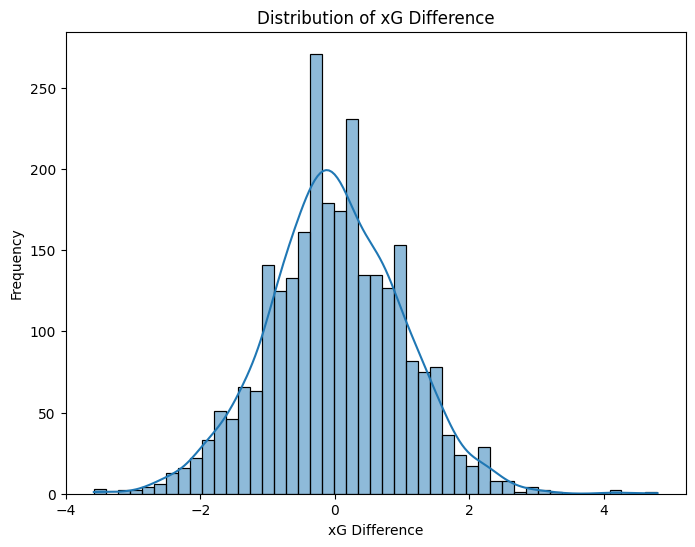

In [10]:
# b) Distribution of xG_Difference
plt.figure(figsize=(8, 6))
sns.histplot(matches['xG_Difference'], kde=True)
plt.title('Distribution of xG Difference')
plt.xlabel('xG Difference')
plt.ylabel('Frequency')
plt.show()

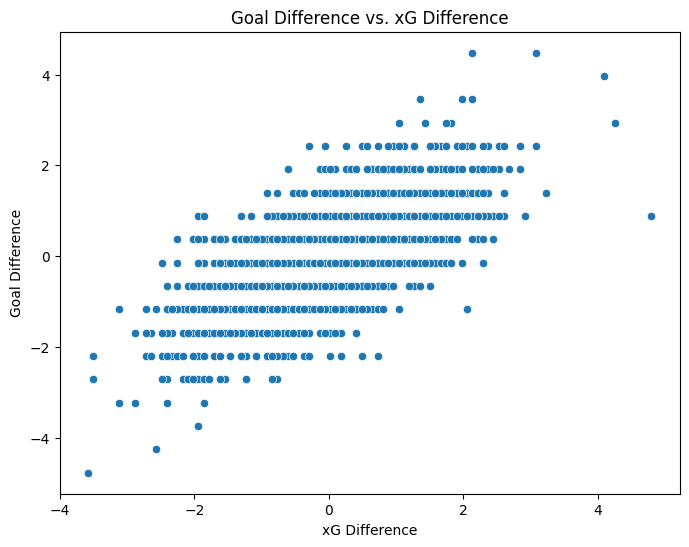

In [11]:
# c) Scatter plot of GoalDifference vs. xG_Difference
plt.figure(figsize=(8, 6))
sns.scatterplot(x='xG_Difference', y='GoalDifference', data=matches)
plt.title('Goal Difference vs. xG Difference')
plt.xlabel('xG Difference')
plt.ylabel('Goal Difference')
plt.show()

In [12]:
matches.head()

,Date,GoalDifference,xG_Difference,Season,Sh_per_90_Standard,SoT_percent_Standard,Sh_per_90_Standard_Away,SoT_percent_Standard_Away,HomeRank,AwayRank,...,Away_Nott'ham Forest,Away_Sheffield Utd,Away_Southampton,Away_Stoke City,Away_Swansea City,Away_Tottenham,Away_Watford,Away_West Brom,Away_West Ham,Away_Wolves
0,2017-08-11,0.369601,0.566543,2018,1.233700,1.658597,-0.647868,-0.095206,-1.450488,-1.312197,...,False,False,False,False,False,False,False,False,False,False
1,2017-08-12,-0.144324,-0.607563,2018,-0.460957,-1.463173,1.736282,0.851847,-1.307815,-1.169590,...,False,False,False,False,False,False,False,False,False,False
2,2017-08-12,-1.686099,-0.529289,2018,-0.112057,-1.533325,-1.270904,-1.322869,-0.737124,-1.454804,...,False,False,False,False,False,False,False,False,False,False
3,2017-08-12,0.369601,0.409995,2018,-1.083993,-1.322869,-0.153593,-0.025054,-1.165142,-0.599163,...,False,False,False,False,False,False,False,False,False,False
4,2017-08-12,-0.658249,0.488269,2018,1.387382,0.571239,-1.071532,0.045098,-0.451779,-1.169590,...,False,False,False,False,False,False,False,False,False,False


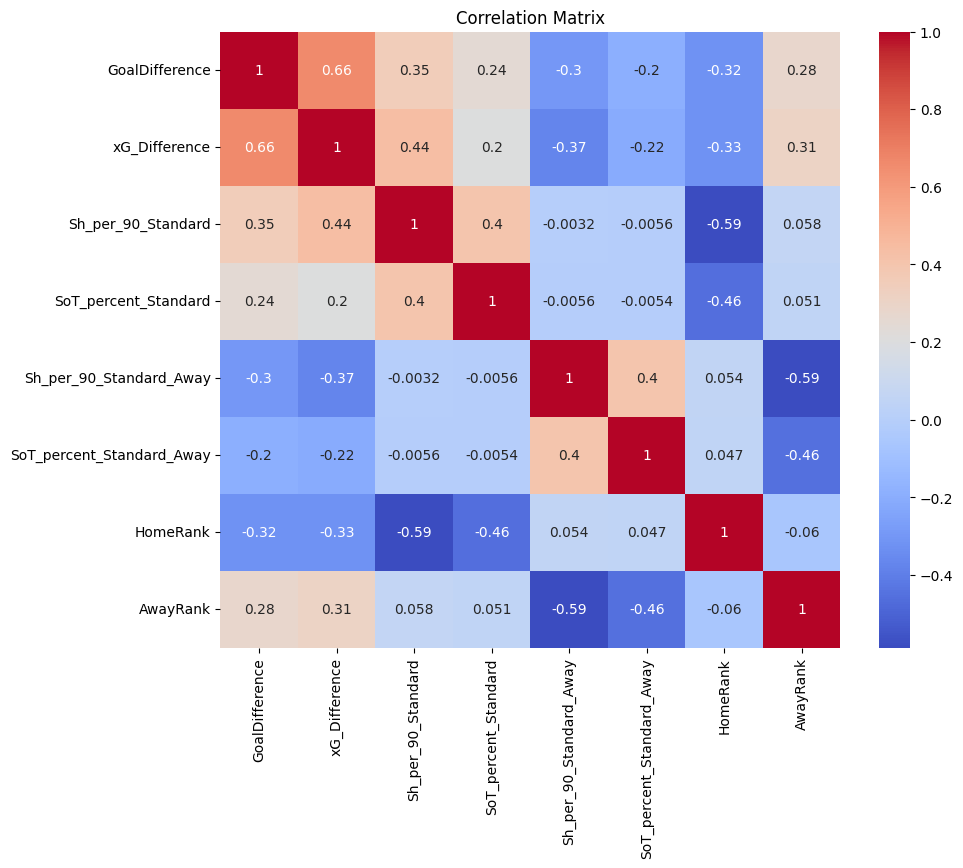

In [13]:
#  Correlation Matrix
correlation_matrix = matches[['GoalDifference', 'xG_Difference', 'Sh_per_90_Standard', 'SoT_percent_Standard', 'Sh_per_90_Standard_Away', 'SoT_percent_Standard_Away', 'HomeRank', 'AwayRank']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Key Takeaways:

(xG) is a good predictor of GoalDifference.
There are some interesting relationships between (team rank) and shooting statistics. Higher-ranked teams seem to take fewer shots but have higher goal and (xG) differences.
The correlations between home and away stats are generally consistent, suggesting that team performance is relatively stable regardless of venue.

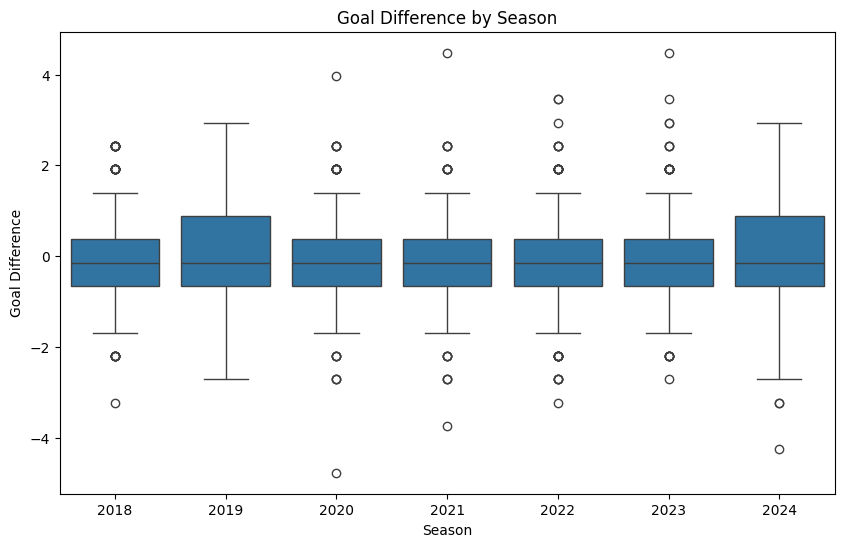

In [14]:
# Goal Difference by Season
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='GoalDifference', data=matches)
plt.title('Goal Difference by Season')
plt.xlabel('Season')
plt.ylabel('Goal Difference')
plt.show()

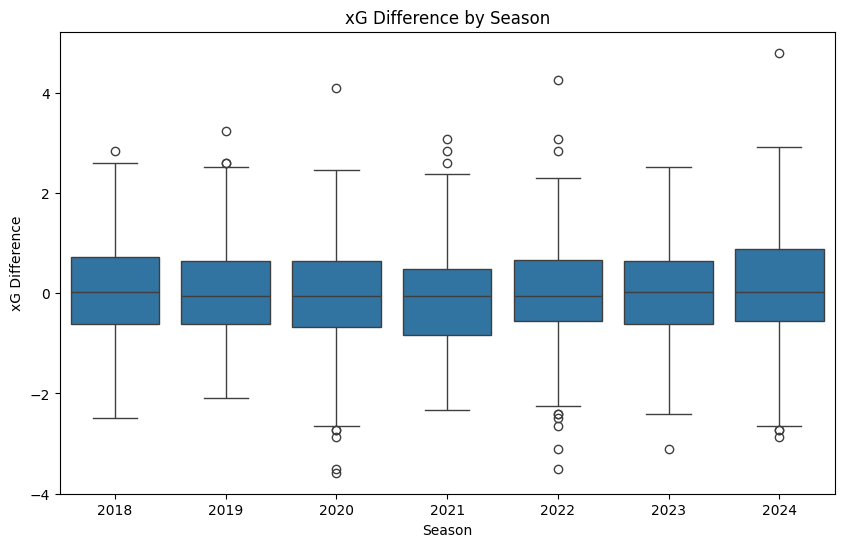

In [15]:
# xG Difference by Season
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='xG_Difference', data=matches)
plt.title('xG Difference by Season')
plt.xlabel('Season')
plt.ylabel('xG Difference')
plt.show()

In [16]:
columns_to_keep = ['Date', 'GoalDifference', 'xG_Difference', 'Season',
                   'Sh_per_90_Standard', 'Sh_per_90_Standard_Away',
                   'HomeRank', 'AwayRank'] + [col for col in matches.columns if 'Home_' in col or 'Away_' in col]
teams = matches[columns_to_keep]

In [17]:
teams.head()

,Date,GoalDifference,xG_Difference,Season,Sh_per_90_Standard,Sh_per_90_Standard_Away,HomeRank,AwayRank,Home_Arsenal,Home_Aston Villa,...,Away_Nott'ham Forest,Away_Sheffield Utd,Away_Southampton,Away_Stoke City,Away_Swansea City,Away_Tottenham,Away_Watford,Away_West Brom,Away_West Ham,Away_Wolves
0,2017-08-11,0.369601,0.566543,2018,1.233700,-0.647868,-1.450488,-1.312197,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2017-08-12,-0.144324,-0.607563,2018,-0.460957,1.736282,-1.307815,-1.169590,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2017-08-12,-1.686099,-0.529289,2018,-0.112057,-1.270904,-0.737124,-1.454804,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2017-08-12,0.369601,0.409995,2018,-1.083993,-0.153593,-1.165142,-0.599163,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2017-08-12,-0.658249,0.488269,2018,1.387382,-1.071532,-0.451779,-1.169590,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
teams.to_csv("/home/yassine/football_predict/R_csv/teams_final.csv", index=False)
